# Skin Disease Classification Using CNN
### Objective:
To build a Convolutional Neural Network (CNN) model that can classify different types of skin conditions from image data using the Kaggle "Skin Disease Image Dataset". This project aims to contribute to early detection and awareness of skin-related diseases using AI-based image classification.


In [2]:
import os
import pandas as pd
from PIL import Image

In [8]:
# Load the 28x28 RGB CSV
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

# Preview structure
print(df.shape)
df.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


🧠 Step-by-Step Data Processing
Here’s how we’ll proceed:

Separate pixel data and labels

Reshape pixel data to 3D (28x28x3) images

Normalize pixel values (0–255 → 0–1)

One-hot encode the labels (for classification)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [10]:
# 2. Reshape pixel data to (num_samples, 28, 28, 3)
X = X.reshape(-1, 28, 28, 3)

In [11]:
# 3. Normalize pixel values
X = X / 255.0

In [18]:
# 4. One-hot encode labels
y = to_categorical(y, num_classes=7)

In [21]:
# 5. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 8012
Test samples: 2003


🏗️ Code: CNN Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [23]:
# Build the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting

    Dense(7, activation='softmax')  # 7 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,223 (879.78 KB)

 Trainable params: 225,223 (879.78 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6577 - loss: 1.2123 - val_accuracy: 0.6690 - val_loss: 0.9471
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6684 - loss: 0.9674 - val_accuracy: 0.6675 - val_loss: 0.8926
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6786 - loss: 0.9139 - val_accuracy: 0.6750 - val_loss: 0.9039
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6866 - loss: 0.8754 - val_accuracy: 0.6900 - val_loss: 0.8664
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6875 - loss: 0.8624 - val_accuracy: 0.6895 - val_loss: 0.8776
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6957 - loss: 0.8407 - val_accuracy: 0.7049 - val_loss: 0.8133
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7021 - loss: 0.8191 - val_accuracy: 0.6940 - val_loss: 0.8267
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6987 - loss: 0.7991 - val_accu

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7081 - loss: 0.7737
Test accuracy: 0.720918595790863


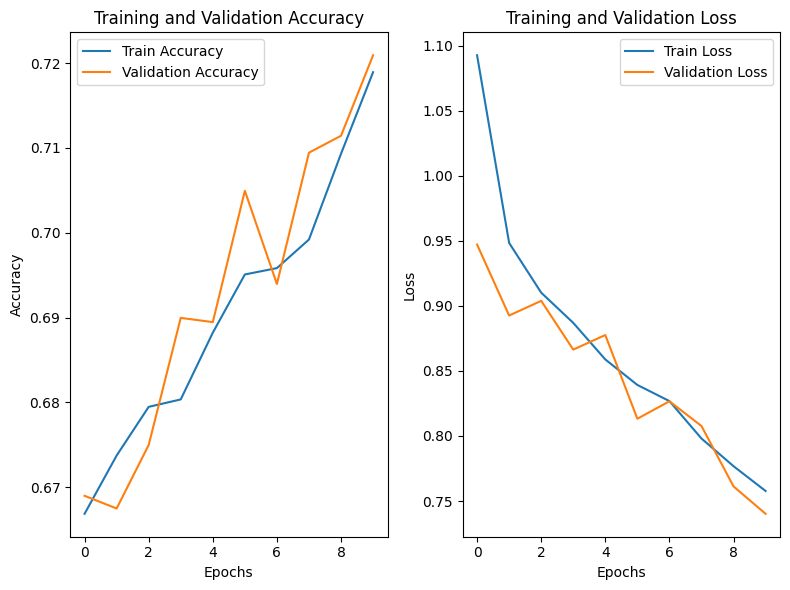

In [36]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy vs. epochs
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss vs. epochs
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [37]:
# Save the model to a file
model.save('skin_disease_model.h5')
print("model saved successfully")

model saved successfully
